In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



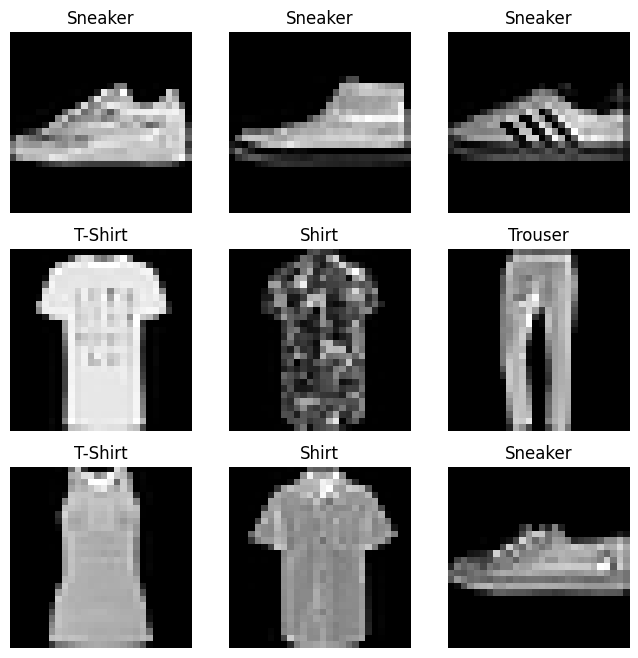

In [2]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()  # 균일 분포에서 랜덤 숫자 생성.
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
# torch.randint(len(training_data), size=(1,))  # 균일 분포에서 랜덤 숫자 생성.

# 0에서 10 사이의 숫자 5개를 생성
exp1 = torch.randint(0, 10, (5,))

print(f"")

# 10에서 20 사이의 숫자 3x3 텐서 생성
exp2 = torch.randint(10, 20, (3, 3))

# 0에서 10 사이의 숫자 2x3 텐서 생성, seed 값 고정
torch.manual_seed(0) # torch.manual_seed() 함수를 사용하여 랜덤 시드를 설정하면 매번 동일한 결과를 얻을 수 있습니다.
exp3 = torch.randint(0, 10, (2, 3))
exp4 = torch.randint(0, 10, (2, 3))
torch.manual_seed(0)
exp5 = torch.randint(0, 10, (2, 3))

print(f"exp1 : {exp1}")
print(f"exp2 : {exp2}")
print(f"exp3 : {exp3}")
print(f"exp4 : {exp4}")
print(f"exp5 : {exp5}")


exp1 : tensor([7, 3, 7, 3, 1])
exp2 : tensor([[16, 16, 19],
        [18, 16, 16],
        [18, 14, 13]])
exp3 : tensor([[4, 9, 3],
        [0, 3, 9]])
exp4 : tensor([[7, 3, 7],
        [3, 1, 6]])
exp5 : tensor([[4, 9, 3],
        [0, 3, 9]])


img.squeeze()는 모든 차원 크기가 1인 축을 제거합니다.

## 1. 연산 속도 향상

불필요한 차원을 제거하여 메모리 사용량을 줄이고, 연산에 필요한 데이터 접근 시간을 단축합니다.
특히, CNN 모델에서 이미지 배열의 채널 축 (예: (1, 28, 28, 1)) 을 제거하면 연산 속도 향상 효과가 뚜렷합니다.
## 2. 연산 속도 저하

모델 구조나 코드에 따라 불필요한 차원 제거가 오히려 연산 속도를 저하시킬 수 있습니다.
예를 들어, 배열 reshape 연산이 추가되거나, 특정 차원 정보가 모델에 필요한 경우 속도 저하가 발생할 수 있습니다.
## 3. 주의 사항 및 권장 사항

squeeze() 사용 전후 모델 성능 및 연산 속도를 비교하여 최적화하는 것이 중요합니다.
모델 설계 단계에서 불필요한 차원을 최대한 줄이는 것이 효과적입니다.
코드 작성 시, squeeze() 사용으로 인한 연산 속도 변화를 고려하고 주의해야 합니다.


In [8]:
# With custom datas
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

__init__
The __init__ function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms (covered in more detail in the next section).

The labels.csv file looks like:

tshirt1.jpg, 0  
tshirt2.jpg, 0  
......  
ankleboot999.jpg, 9  

self.transform(): 데이터 변환 함수 또는 객체입니다.  
self.target_transform(): 타겟(레이블)에 특정한 데이터 변환 함수 또는 객체입니다.

"__len__"  
The "__len__" function returns the number of samples in our dataset.  

In [10]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


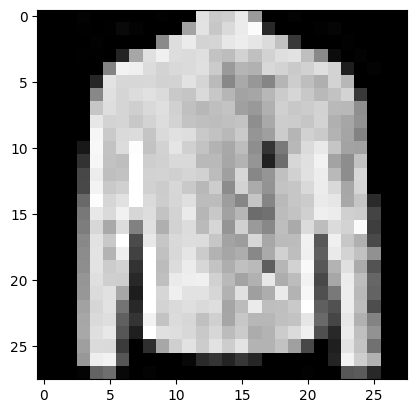

Label: 4


In [11]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")